# CAR INSURANCE RECOMMENDER

In this project I have created a car insurance recommendation system.
Based of your car company,car model,fuel type,no. of seats and car engine my system will suggest you best 5 car isurance company and their policy plans which are suitable for your car.


**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

**Data Acquisition**

I have this data from kaggle named as 'Car details from car dekho' it has no Insurance plan information I have manually added this data based of car features and created a new dataset named as Insurance plans.

In [4]:
df=pd.read_csv("Insurance plan.csv")

In [5]:
df.head()

,company,name,fuel,km_driven,mileage,torque,seats,engine,Insurance_id,Insurance
0,Maruti,Maruti Swift Dzire VDI,Diesel,145500,23.4 kmpl,190Nm@ 2000rpm,5,1248 CC,11,"Comapany Name:ICICI Lombord,Policy Plan:2000000"
1,Honda,Honda City 2017-2020 EXi,Petrol,120000,21.14 kmpl,250Nm@ 1500-2500rpm,5,1498 CC,11,"Comapany Name:ICICI Lombord,Policy Plan:2000000"
2,Hyundai,Hyundai i20 Sportz Diesel,Diesel,140000,17.7 kmpl,"12.7@ 2,700(kgm@ rpm)",5,1497 CC,11,"Comapany Name:ICICI Lombord,Policy Plan:2000000"
3,Maruti,Maruti Swift VXI BSIII,Petrol,127000,23.0 kmpl,22.4 kgm at 1750-2750rpm,5,1396 CC,11,"Comapany Name:ICICI Lombord,Policy Plan:2000000"
4,Hyundai,Hyundai Xcent 1.2 VTVT E Plus,Petrol,120000,16.1 kmpl,"11.5@ 4,500(kgm@ rpm)",5,1298 CC,11,"Comapany Name:ICICI Lombord,Policy Plan:2000000"


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7081 entries, 0 to 7080
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company       7081 non-null   object
 1   name          7081 non-null   object
 2   fuel          7081 non-null   object
 3   km_driven     7081 non-null   int64 
 4   mileage       6887 non-null   object
 5   torque        6887 non-null   object
 6   seats         7081 non-null   int64 
 7   engine        7081 non-null   object
 8   Insurance_id  7081 non-null   int64 
 9   Insurance     7081 non-null   object
dtypes: int64(3), object(7)
memory usage: 553.3+ KB


**Handling missing values**

I removed those columns that I doesent need and check whether there is any missing value or not.

In [7]:
df.drop(['km_driven','mileage','torque'],inplace=True,axis=1)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7081 entries, 0 to 7080
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company       7081 non-null   object
 1   name          7081 non-null   object
 2   fuel          7081 non-null   object
 3   seats         7081 non-null   int64 
 4   engine        7081 non-null   object
 5   Insurance_id  7081 non-null   int64 
 6   Insurance     7081 non-null   object
dtypes: int64(2), object(5)
memory usage: 387.4+ KB


In [9]:
df.head()

,company,name,fuel,seats,engine,Insurance_id,Insurance
0,Maruti,Maruti Swift Dzire VDI,Diesel,5,1248 CC,11,"Comapany Name:ICICI Lombord,Policy Plan:2000000"
1,Honda,Honda City 2017-2020 EXi,Petrol,5,1498 CC,11,"Comapany Name:ICICI Lombord,Policy Plan:2000000"
2,Hyundai,Hyundai i20 Sportz Diesel,Diesel,5,1497 CC,11,"Comapany Name:ICICI Lombord,Policy Plan:2000000"
3,Maruti,Maruti Swift VXI BSIII,Petrol,5,1396 CC,11,"Comapany Name:ICICI Lombord,Policy Plan:2000000"
4,Hyundai,Hyundai Xcent 1.2 VTVT E Plus,Petrol,5,1298 CC,11,"Comapany Name:ICICI Lombord,Policy Plan:2000000"


<AxesSubplot:>

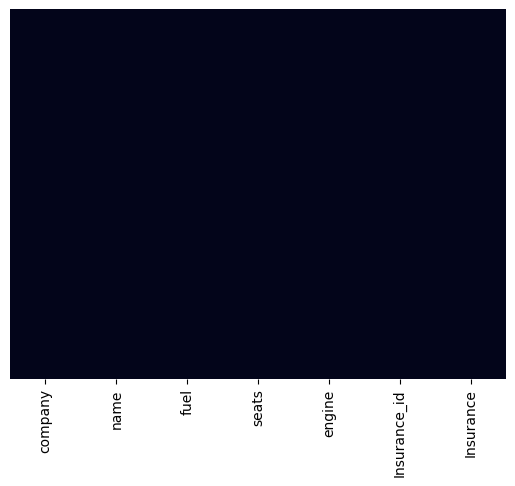

In [10]:
sns.heatmap(df.isnull(),cbar=False,yticklabels=False)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7081 entries, 0 to 7080
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company       7081 non-null   object
 1   name          7081 non-null   object
 2   fuel          7081 non-null   object
 3   seats         7081 non-null   int64 
 4   engine        7081 non-null   object
 5   Insurance_id  7081 non-null   int64 
 6   Insurance     7081 non-null   object
dtypes: int64(2), object(5)
memory usage: 387.4+ KB


**Exploratory data analysis**

Lets go and do some data analysis through visualization

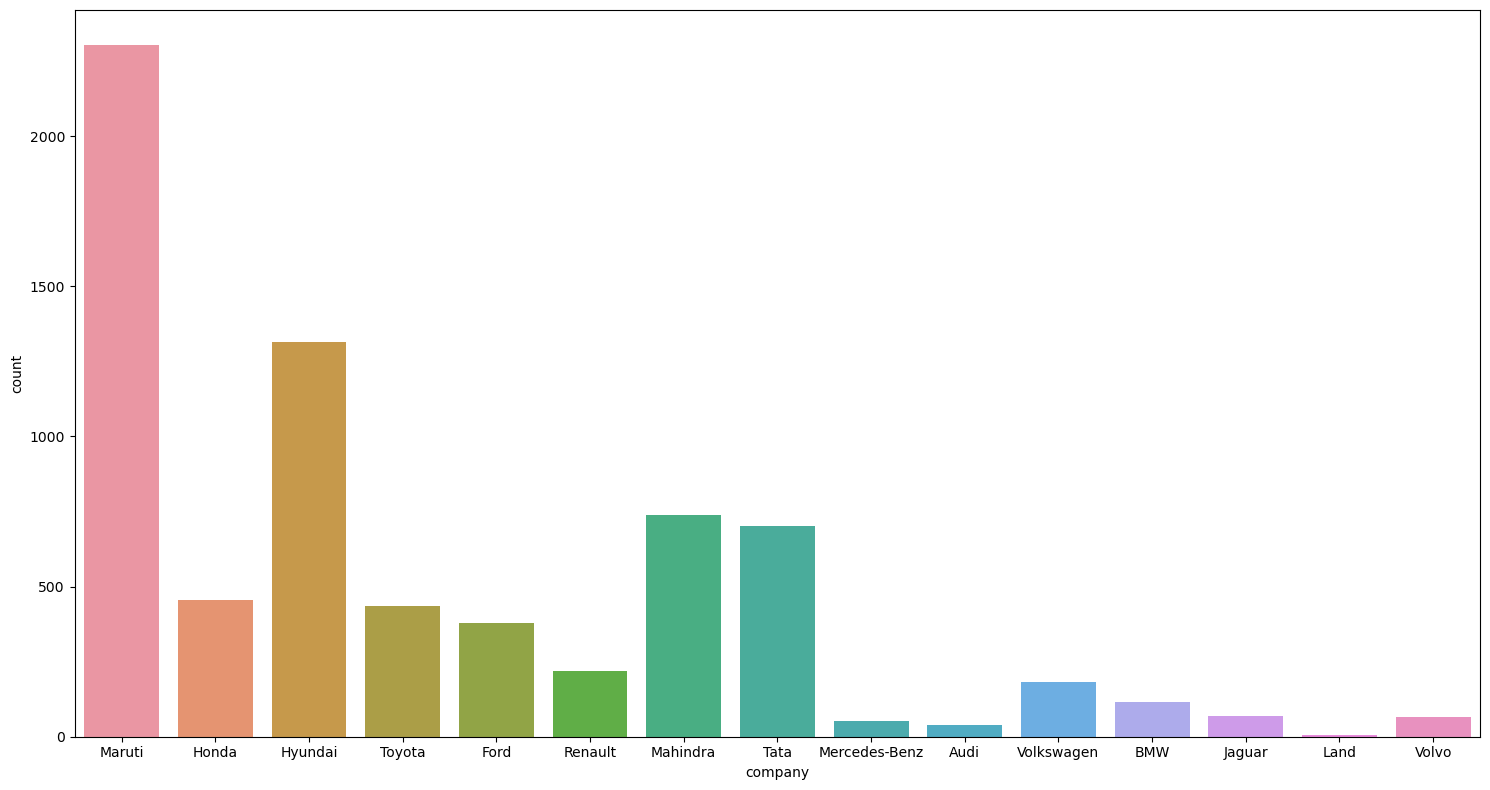

In [12]:
plt.figure(figsize=(15,8))
sns.countplot(x='company',data=df)
plt.tight_layout()

<AxesSubplot:xlabel='fuel', ylabel='count'>

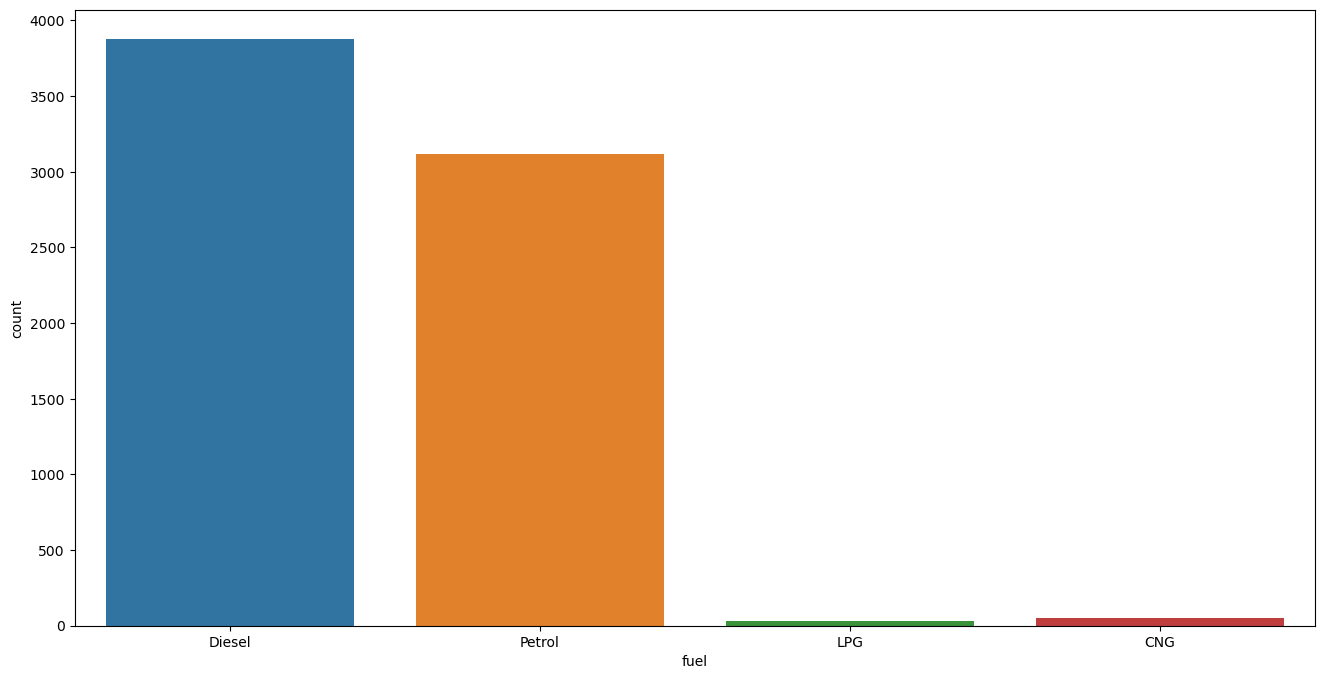

In [13]:
plt.figure(figsize=(16,8))
sns.countplot(x='fuel',data=df)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7081 entries, 0 to 7080
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company       7081 non-null   object
 1   name          7081 non-null   object
 2   fuel          7081 non-null   object
 3   seats         7081 non-null   int64 
 4   engine        7081 non-null   object
 5   Insurance_id  7081 non-null   int64 
 6   Insurance     7081 non-null   object
dtypes: int64(2), object(5)
memory usage: 387.4+ KB


**Data Preprocessing**

cleaning the data for making a model

In [15]:
df.head()

,company,name,fuel,seats,engine,Insurance_id,Insurance
0,Maruti,Maruti Swift Dzire VDI,Diesel,5,1248 CC,11,"Comapany Name:ICICI Lombord,Policy Plan:2000000"
1,Honda,Honda City 2017-2020 EXi,Petrol,5,1498 CC,11,"Comapany Name:ICICI Lombord,Policy Plan:2000000"
2,Hyundai,Hyundai i20 Sportz Diesel,Diesel,5,1497 CC,11,"Comapany Name:ICICI Lombord,Policy Plan:2000000"
3,Maruti,Maruti Swift VXI BSIII,Petrol,5,1396 CC,11,"Comapany Name:ICICI Lombord,Policy Plan:2000000"
4,Hyundai,Hyundai Xcent 1.2 VTVT E Plus,Petrol,5,1298 CC,11,"Comapany Name:ICICI Lombord,Policy Plan:2000000"


In [16]:
df['engine']=df['engine'].apply(lambda x:x.split()[0])

In [17]:
df['company'] = df['company'].astype(str)
df['name'] = df['name'].astype(str)
df['engine'] = df['engine'].astype(str)
df['fuel'] = df['fuel'].astype(str)
df['seats']=df['seats'].astype(str)

In [18]:
df['company'] = df['company'].apply(lambda x:x.lower())
df['name'] = df['name'].apply(lambda x:x.lower())
df['fuel'] = df['fuel'].apply(lambda x:x.lower())
df['seats'] = df['seats'].apply(lambda x:x.lower())
df['engine'] = df['engine'].apply(lambda x:x.lower())

In [19]:
df['company'] =df['company'].apply(lambda x:x.split())
df['name'] = df['name'].apply(lambda x:x.split())
df['seats'] = df['seats'].apply(lambda x:x.split())
df['engine'] = df['engine'].apply(lambda x:x.split())
df['fuel'] = df['fuel'].apply(lambda x:x.split())

In [20]:
df.head()

,company,name,fuel,seats,engine,Insurance_id,Insurance
0,[maruti],"[maruti, swift, dzire, vdi]",[diesel],[5],[1248],11,"Comapany Name:ICICI Lombord,Policy Plan:2000000"
1,[honda],"[honda, city, 2017-2020, exi]",[petrol],[5],[1498],11,"Comapany Name:ICICI Lombord,Policy Plan:2000000"
2,[hyundai],"[hyundai, i20, sportz, diesel]",[diesel],[5],[1497],11,"Comapany Name:ICICI Lombord,Policy Plan:2000000"
3,[maruti],"[maruti, swift, vxi, bsiii]",[petrol],[5],[1396],11,"Comapany Name:ICICI Lombord,Policy Plan:2000000"
4,[hyundai],"[hyundai, xcent, 1.2, vtvt, e, plus]",[petrol],[5],[1298],11,"Comapany Name:ICICI Lombord,Policy Plan:2000000"


In [21]:
df['feature'] = df['company']+df['name']+df['seats']+df['engine']+df['fuel']

In [22]:
df['feature'] = df['feature'].apply(lambda x:" ".join(x))
df['company'] = df['company'].apply(lambda x:" ".join(x))
df['fuel'] = df['fuel'].apply(lambda x:" ".join(x))
df['engine'] = df['engine'].apply(lambda x:" ".join(x))
df['seats'] = df['seats'].apply(lambda x:" ".join(x))
df['name'] = df['name'].apply(lambda x:" ".join(x))

In [23]:
df.head()

,company,name,fuel,seats,engine,Insurance_id,Insurance,feature
0,maruti,maruti swift dzire vdi,diesel,5,1248,11,"Comapany Name:ICICI Lombord,Policy Plan:2000000",maruti maruti swift dzire vdi 5 1248 diesel
1,honda,honda city 2017-2020 exi,petrol,5,1498,11,"Comapany Name:ICICI Lombord,Policy Plan:2000000",honda honda city 2017-2020 exi 5 1498 petrol
2,hyundai,hyundai i20 sportz diesel,diesel,5,1497,11,"Comapany Name:ICICI Lombord,Policy Plan:2000000",hyundai hyundai i20 sportz diesel 5 1497 diesel
3,maruti,maruti swift vxi bsiii,petrol,5,1396,11,"Comapany Name:ICICI Lombord,Policy Plan:2000000",maruti maruti swift vxi bsiii 5 1396 petrol
4,hyundai,hyundai xcent 1.2 vtvt e plus,petrol,5,1298,11,"Comapany Name:ICICI Lombord,Policy Plan:2000000",hyundai hyundai xcent 1.2 vtvt e plus 5 1298 p...


**Making our system using sklearn**

In [24]:
from sklearn.feature_extraction.text import CountVectorizer

In [25]:
cv = CountVectorizer(max_features=7000,stop_words='english')

In [26]:
vectors=cv.fit_transform(df['feature']).toarray()

In [27]:
vectors.shape

(7081, 753)

In [28]:
cv.get_feature_names()

C:\Users\reliance\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['02',
 '05',
 '0l',
 '10',
 '100',
 '1047',
 '1061',
 '1086',
 '110ps',
 '1120',
 '1150',
 '1172',
 '1186',
 '1193',
 '1194',
 '1196',
 '1197',
 '1198',
 '1199',
 '120',
 '1248',
 '1298',
 '1299',
 '1339',
 '1341',
 '1343',
 '1364',
 '1368',
 '1373',
 '1388',
 '1390',
 '1396',
 '1399',
 '14',
 '1405',
 '1422',
 '1451',
 '1461',
 '1462',
 '1489',
 '1493',
 '1495',
 '1496',
 '1497',
 '1498',
 '1499',
 '1527',
 '1582',
 '1586',
 '1590',
 '1591',
 '1595',
 '1596',
 '1597',
 '1598',
 '1599',
 '16',
 '177',
 '1781',
 '1794',
 '1795',
 '1796',
 '1797',
 '1798',
 '1799',
 '1896',
 '1948',
 '1950',
 '1956',
 '1968',
 '1969',
 '1984',
 '1991',
 '1994',
 '1995',
 '1997',
 '1998',
 '1999',
 '1l',
 '200',
 '2001',
 '2006',
 '2009',
 '2010',
 '2011',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '2020',
 '2092',
 '20d',
 '2143',
 '2148',
 '2179',
 '2197',
 '2198',
 '2199',
 '220',
 '2200',
 '220d',
 '2231',
 '2354',
 '2359',
 '2362',
 '2393',
 '2446',
 '2477',
 '2487',
 '2489',
 '2494',
 '

In [29]:
from sklearn.metrics.pairwise import cosine_similarity

In [30]:
similarity=cosine_similarity(vectors)

In [31]:
def recommand():
    print(df['company'].unique())
    obj1=input("Enter company:").lower()
    print(df[df['company']==obj1]['name'].unique())
    print()
    obj2=input("Enter Model Name:").lower()
    print()
    print(df[df['name']==obj2]['fuel'].unique())
    obj3=input("Enter Fuel Type:").lower()
    print(df[df['name']==obj2]['engine'].unique())
    obj4=input("Enter engine:").lower()
    car_index=df[(df['company']==obj1) & (df['name']==obj2)&(df['fuel']==obj3)&(df['engine']==obj4)].index[0]
    k=similarity[car_index]
    lst=sorted(list(enumerate(k)),reverse=True,key=lambda x:x[1])[1:]
    lst1 = df['Insurance'].values.tolist()
    lst1 = list(enumerate(lst1))
    lst2= []
    for i in lst:
        for j in lst1:
            if i[0]==j[0]:
                if j[1] not in lst2:
                    lst2.append(j[1])
    print()
    print("Your Insurance Plans")
    print()
    for i in lst2[0:5]:
        print(i)
    print()
    
    print("If you want more options I can Help You.Please Enter Y for More plans and N  for stop.")
    a = input("Enter Your choice:").lower()
    
    if a=='y':
        print()
        print("More Policy Plans")
        print()
        for i in lst2[5:10]:
            print(i)
        print()
        print("Thank you")
    else:
        print("Thank you")

In [ ]:
recommand()

['maruti' 'honda' 'hyundai' 'toyota' 'ford' 'renault' 'mahindra' 'tata'
 'mercedes-benz' 'audi' 'volkswagen' 'bmw' 'jaguar' 'land' 'volvo']
Enter company:audi
['audi a6 2.0 tdi technology' 'audi a6 2.0 tdi design edition'
 'audi q5 35tdi premium plus' 'audi q7 35 tdi quattro premium'
 'audi a4 2.0 tdi' 'audi q5 2.0 tdi'
 'audi q3 2.0 tdi quattro premium plus' 'audi a3 35 tdi premium plus'
 'audi q5 3.0 tdi quattro' 'audi q7 3.0 tdi quattro'
 'audi q7 3.0 tdi quattro premium plus'
 'audi q3 35 tdi quattro premium plus' 'audi a4 35 tdi premium plus'
 'audi a4 1.8 tfsi' 'audi q5 45 tdi quattro technology'
 'audi a6 35 tfsi matrix' 'audi a4 2.0 tdi 177 bhp premium plus'
 'audi q3 35 tdi quattro technology' 'audi a6 2.0 tdi premium plus'
 'audi a6 2.0 tdi']

Enter Model Name:audi a4 2.0 tdi

['diesel']
Enter Fuel Type:diesel
['1498' '1197']
